In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
train_path: str = os.path.join(os.getcwd(), "contents", "train.csv")
test_path: str = os.path.join(os.getcwd(), "contents", "test.csv")
submission_path: str = os.path.join(os.getcwd(), "contents", "sample_submission.csv")

### Train data

In [3]:
train_df = pd.read_csv(train_path)

print(train_df.shape)
train_df.head(5)

(11504798, 12)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [5]:
train_df['Response'].value_counts()

Response
0    10089739
1     1415059
Name: count, dtype: int64

In [6]:
train_tmp = train_df.copy()
train_tmp['Gender'] = train_tmp['Gender'].replace(['Female', 'Male'], [0, 1])
train_tmp['Vehicle_Age'] = train_tmp['Vehicle_Age'].replace(['1-2 Year', '< 1 Year', '> 2 Years'], [0, 1, 2])
train_tmp['Vehicle_Damage'] = train_tmp['Vehicle_Damage'].replace(['No', 'Yes'], [0, 1])
train_tmp.head(5)

/tmp/ipykernel_18472/777140542.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_tmp['Gender'] = train_tmp['Gender'].replace(['Female', 'Male'], [0, 1])
/tmp/ipykernel_18472/777140542.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_tmp['Vehicle_Age'] = train_tmp['Vehicle_Age'].replace(['1-2 Year', '< 1 Year', '> 2 Years'], [0, 1, 2])
/tmp/ipykernel_18472/777140542.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly ca

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,35.0,0,0,1,65101.0,124.0,187,0
1,1,1,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,2,0,25,1,14.0,1,1,0,38043.0,152.0,254,0
3,3,0,35,1,1.0,0,0,1,2630.0,156.0,76,0
4,4,0,36,1,15.0,1,0,0,31951.0,152.0,294,0


In [7]:
train_tmp.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,5.413510e-01,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,5.215298e-01,5.026798e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,4.982872e-01,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,5.767390e-01,4.999928e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,0.000000e+00,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,1.000000e+00,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,1.000000e+00,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,1.000000e+00,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,2.000000e+00,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [8]:
# Correlation
corrmat = train_tmp.drop(['id'], axis=1).corr()
corrmat["Gender"]

Gender                  1.000000
Age                     0.157663
Driving_License        -0.018702
Region_Code            -0.000106
Previously_Insured     -0.087614
Vehicle_Age            -0.117661
Vehicle_Damage          0.096989
Annual_Premium          0.010652
Policy_Sales_Channel   -0.116058
Vintage                -0.009535
Response                0.055212
Name: Gender, dtype: float64

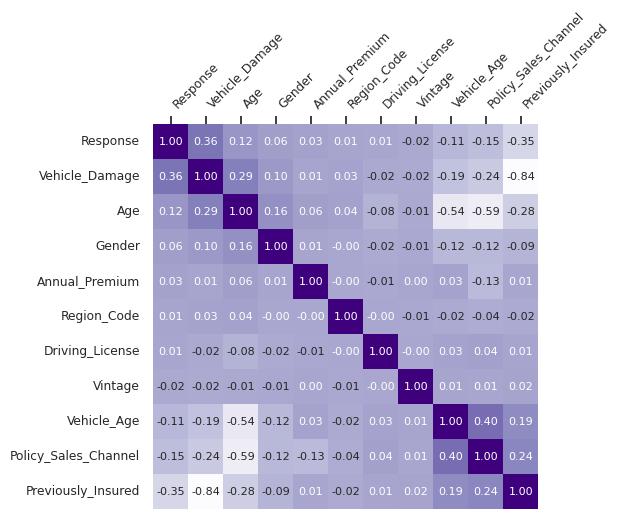

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation with HeartDisease
plt.figure(figsize=(5, 5))
k=11
cols = corrmat.nlargest(k, 'Response')['Response'].index
cm = np.corrcoef(train_tmp[cols].values.T)
sns.set(font_scale=0.8)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, 
                 yticklabels=cols.values, xticklabels=cols.values, cbar_kws={"shrink": 0.8}, cmap="Purples")
hm.xaxis.tick_top()
plt.xticks(rotation=45, ha='left')
plt.show()

In [21]:
train_df['Age'] = pd.qcut(train_df['Age'], q=4)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.histplot(data=train_df, x='Age', y='Response')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'histplot'

<Figure size 1500x500 with 0 Axes>

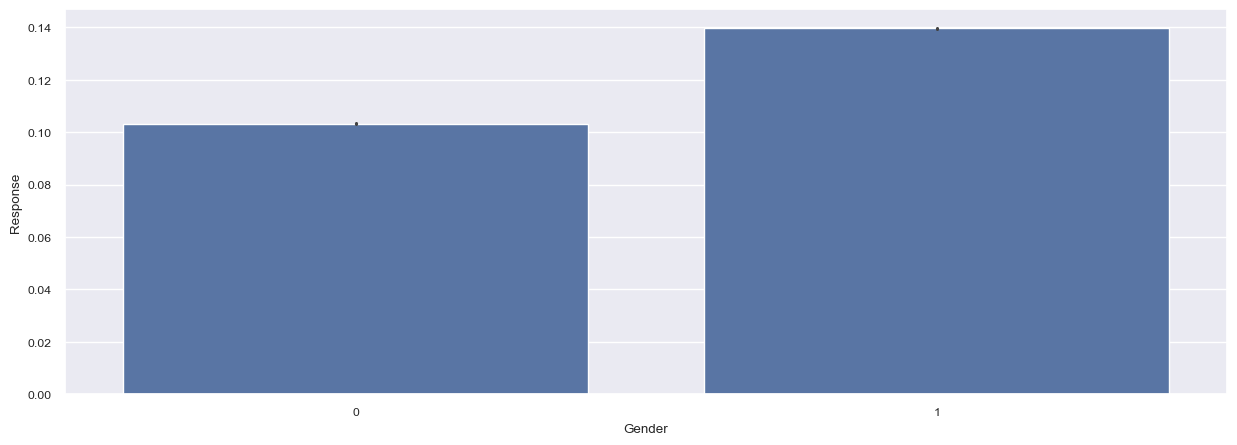

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=train_tmp, x='Gender', y='Response')
plt.show()

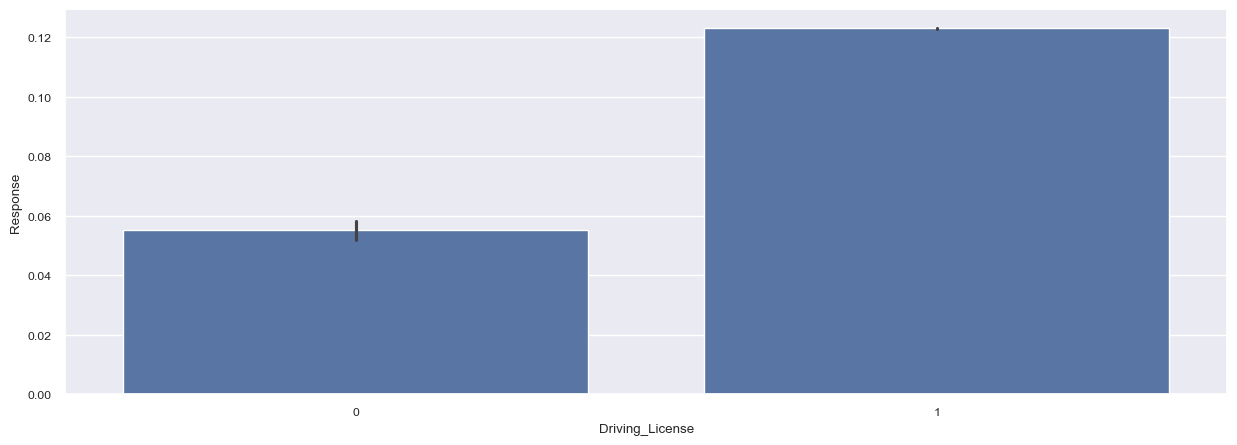

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=train_tmp, x='Driving_License', y='Response')
plt.show()

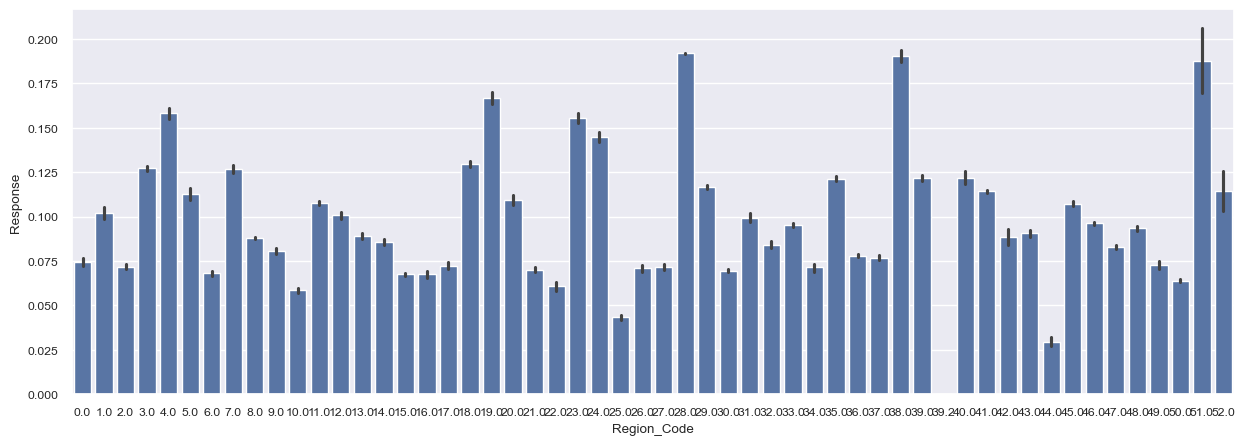

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=train_tmp, x='Region_Code', y='Response')
plt.show()

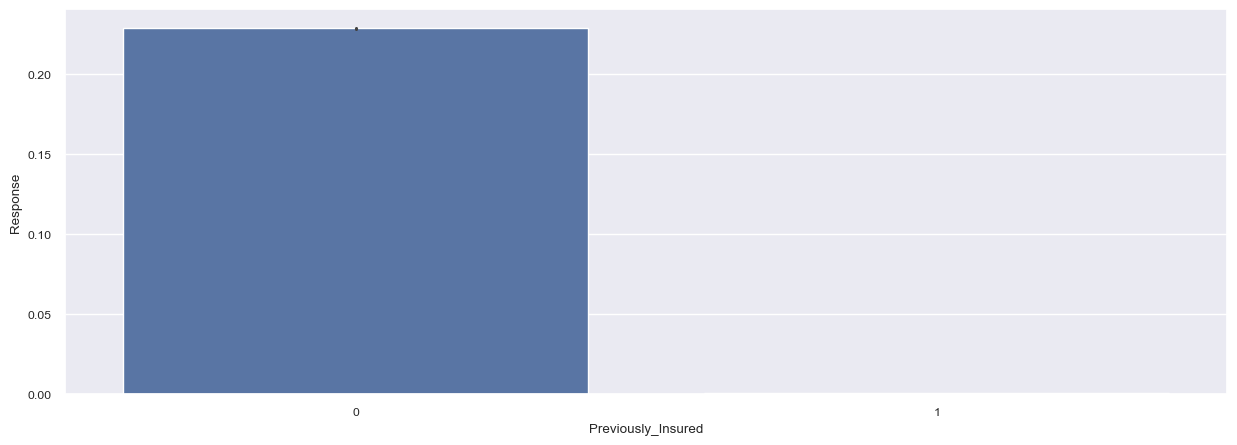

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=train_tmp, x='Previously_Insured', y='Response')
plt.show()

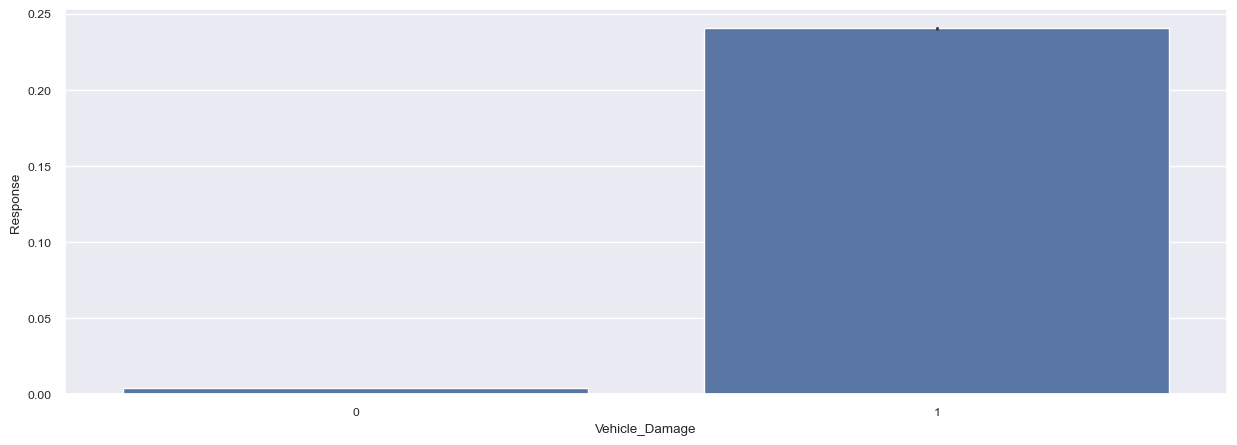

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=train_tmp, x='Vehicle_Damage', y='Response')
plt.show()

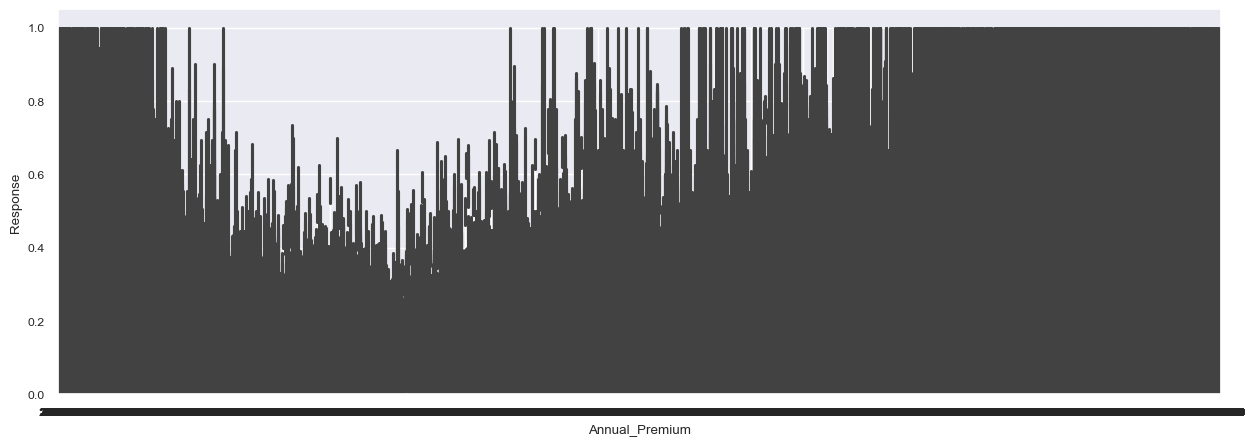

In [ ]:
# plt.figure(figsize=(15, 5))
sns.barplot(data=train_tmp, x='Annual_Premium', y='Response')
plt.show()

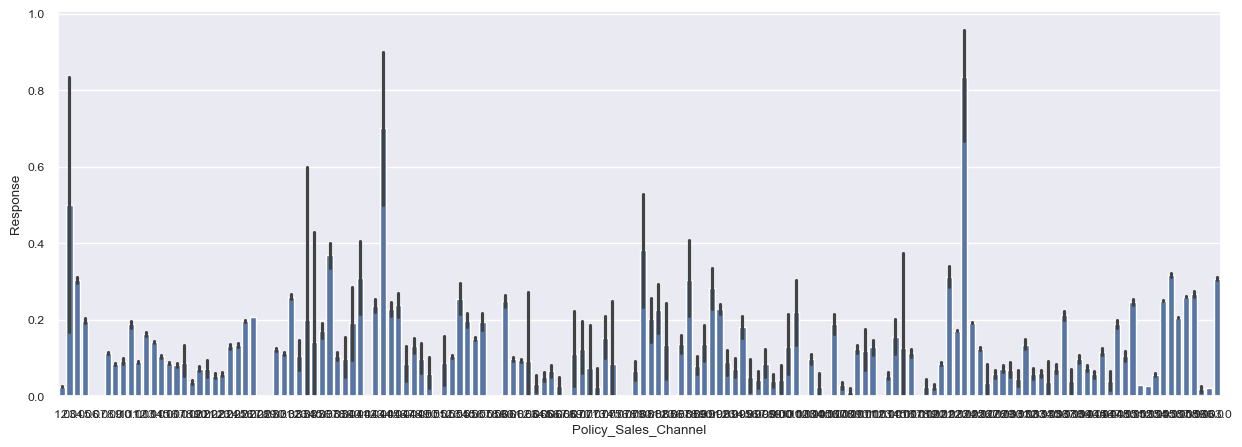

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=train_tmp, x='Policy_Sales_Channel', y='Response')
plt.show()

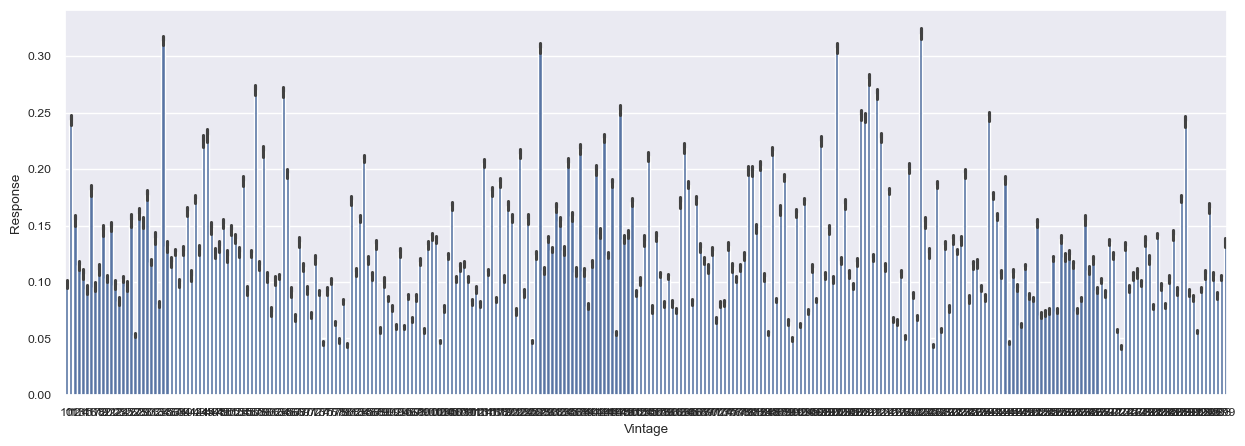

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=train_tmp, x='Vintage', y='Response')
plt.show()

### Test data

In [ ]:
test_df = pd.read_csv(train_path)